In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
df=pd.read_csv('DATA\house_price\\train.csv',usecols= lambda x: x!='Id')
test_x= pd.read_csv('DATA\\house_price\\test.csv',usecols=lambda x: x!='Id')
sub= pd.read_csv('DATA\\house_price\\sample_submission.csv',usecols=lambda x: x!='Id')

In [120]:
# Let's replace column names with lowercase letters
df.rename(columns= str.lower,inplace=True)

In [121]:
high_null= (df.isnull().sum()*100/len(df)).sort_values(ascending=False)[:4]
display(high_null)
# As we see till 'Fence' values mostly is missing

poolqc         99.520548
miscfeature    96.301370
alley          93.767123
fence          80.753425
dtype: float64

In [122]:
df['alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

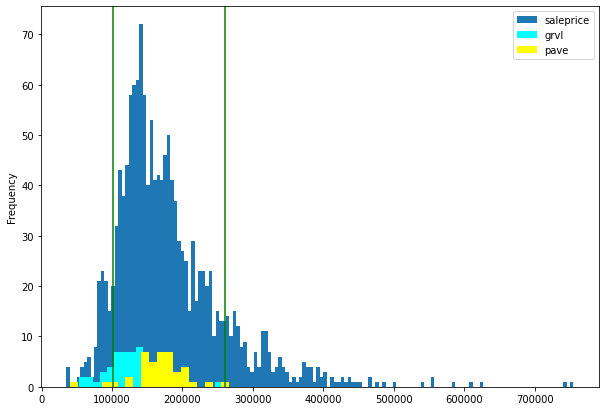

In [123]:
plt.figure(figsize=(10,7))
df['saleprice'].plot(kind='hist',bins=146)
df[df['alley']=='Grvl']['saleprice'].plot(kind='hist',color='cyan',bins=20,label='grvl')
df[df['alley']=='Pave']['saleprice'].plot(kind='hist',color='yellow',bins=20,label='pave')
plt.legend()
plt.axvline(df['saleprice'].mean()+df['saleprice'].std(),color='green')
plt.axvline(df['saleprice'].mean()-df['saleprice'].std(),color='green')

### I knew that poolqc and miscfeature is meaningless. But I thought alley feature could be meaningfull for saleprice but as we see in ditribution, it is located approximately within 1 std from mean. So, reason of its missingness is just random.

In [124]:
df['fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: fence, dtype: int64

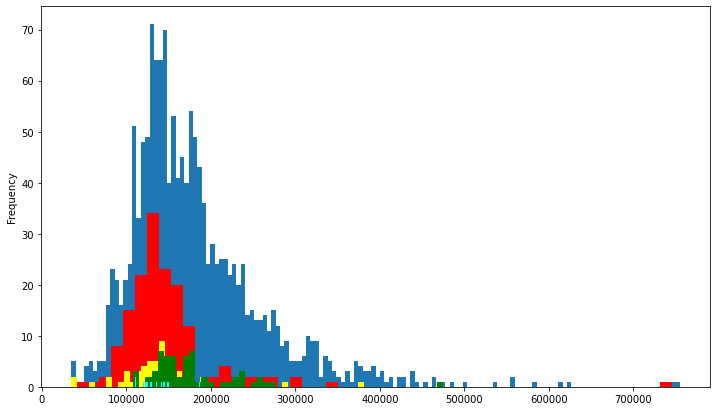

In [125]:
plt.figure(figsize=(12,7))
df['saleprice'].plot(kind='hist',bins=140)
colors= ['red','yellow','green','cyan']
i=0
for fence_type in df['fence'].unique()[1:]:
    df[df['fence']==fence_type]['saleprice'].plot(kind='hist',bins=50,color=colors[i])
    i+=1

## As we see there is same situation as in 'Alley' column 
### *In this case we could drop all of them*

In [126]:
df.drop(columns=high_null.index,axis=1,inplace=True)

In [8]:
# There are some "None"  string as a missing value. we have to change it to numpy NaN.
x['masvnrtype'].replace('None',np.NaN,inplace=True)

In [127]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

In [128]:
from missingno import matrix

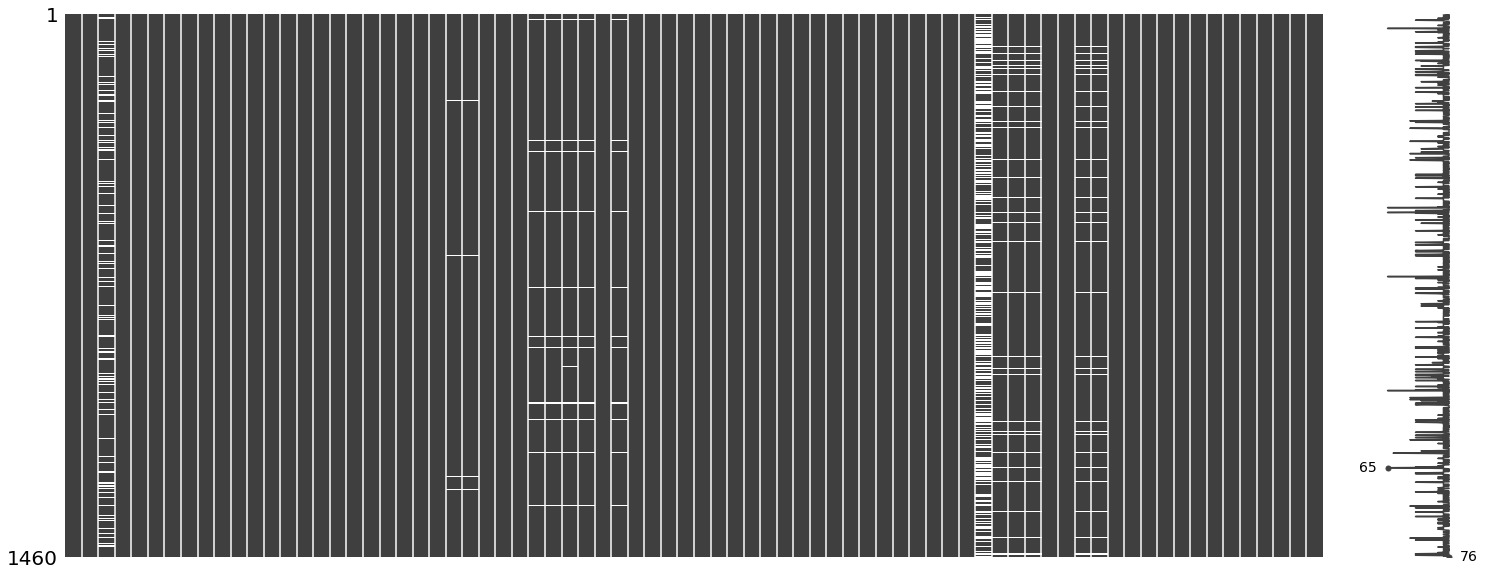

In [129]:
matrix(df);
# Now it doesn't seem any relation between misssingness

In [130]:
df.select_dtypes(include=['O']).head()

,mszoning,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfintype2,heating,heatingqc,centralair,electrical,kitchenqual,functional,fireplacequ,garagetype,garagefinish,garagequal,garagecond,paveddrive,saletype,salecondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [21]:
cat_cols= df.select_dtypes('O').columns

In [106]:
df.select_dtypes(include=['int64','float64']).head()

,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
df.loc[df['yearbuilt']!=df['yearremodadd'],['yearbuilt','yearremodadd']]

,yearbuilt,yearremodadd
2,1997,1998
5,1993,1994
6,1992,2007
15,2009,2010
16,2009,2010
...,...,...
1454,2004,2005
1455,1999,2000
1456,1978,1988
1457,1941,2006


In [116]:
most_real_numeric= (df\
                    .select_dtypes(include=['int64','float64']).nunique()\
                    .sort_values(ascending=True)>=10)
real_numeric=[]
for i in most_real_numeric.index:
    if most_real_numeric[i]==True:
        real_numeric.append(i)
real_numeric

['overallqual',
 'mosold',
 'totrmsabvgrd',
 'mssubclass',
 '3ssnporch',
 'miscval',
 'lowqualfinsf',
 'yearremodadd',
 'screenporch',
 'garageyrblt',
 'lotfrontage',
 'yearbuilt',
 'enclosedporch',
 'bsmtfinsf2',
 'openporchsf',
 'wooddecksf',
 'masvnrarea',
 '2ndflrsf',
 'garagearea',
 'bsmtfinsf1',
 'saleprice',
 'totalbsmtsf',
 '1stflrsf',
 'bsmtunfsf',
 'grlivarea',
 'lotarea']

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


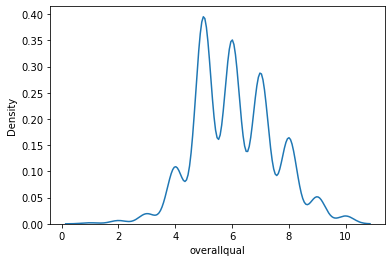

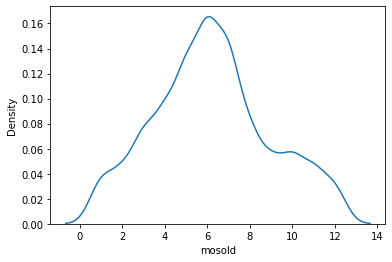

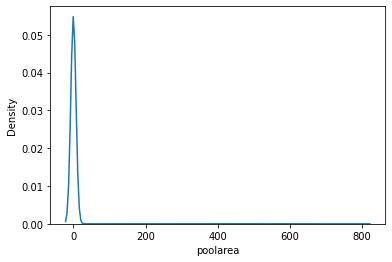

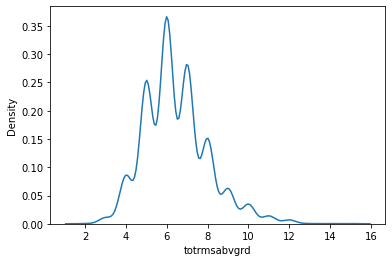

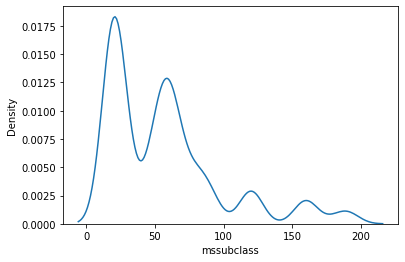

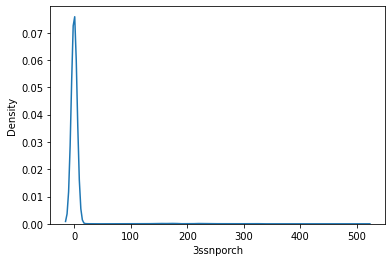

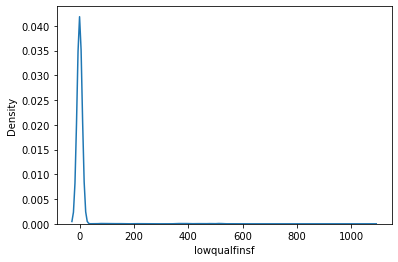

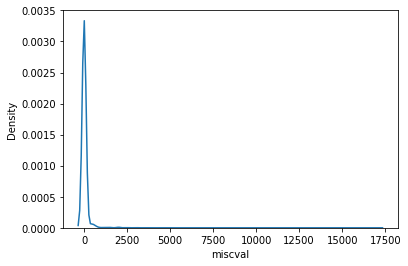

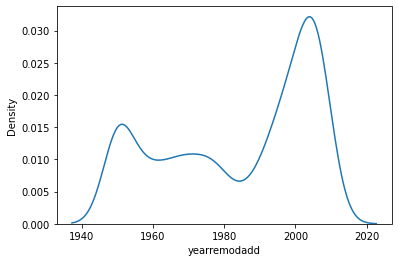

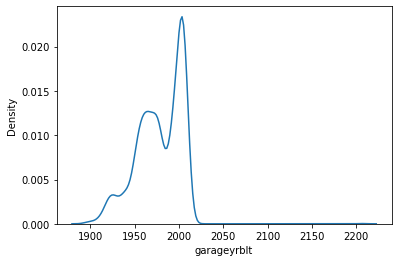

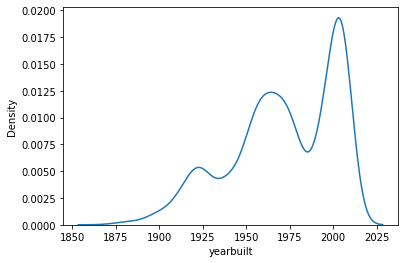

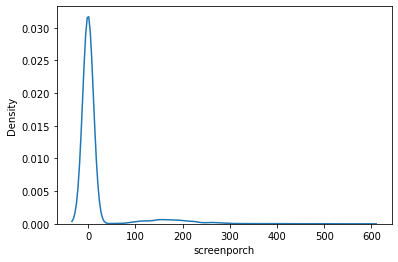

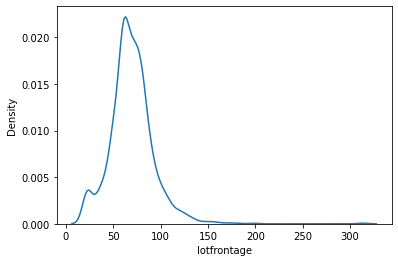

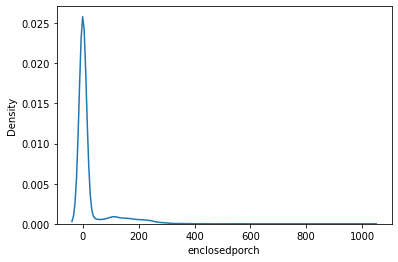

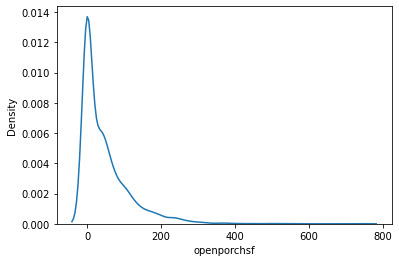

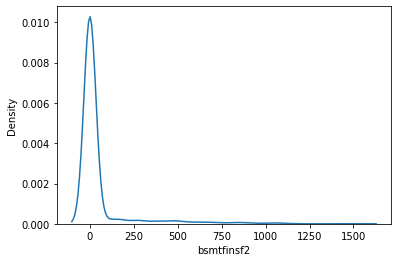

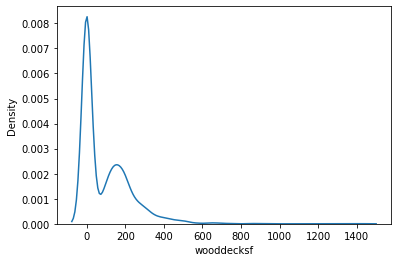

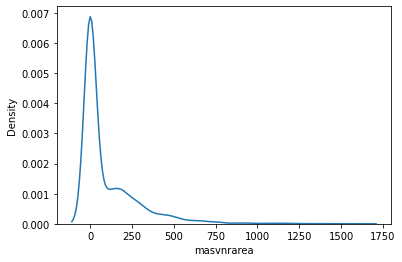

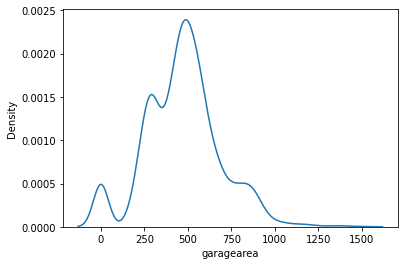

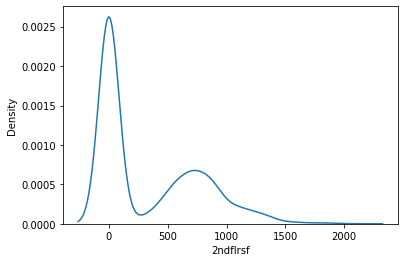

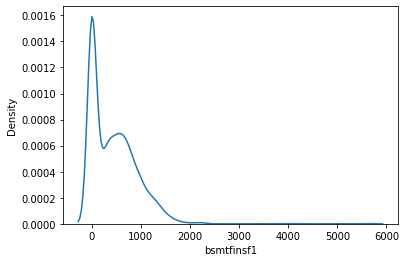

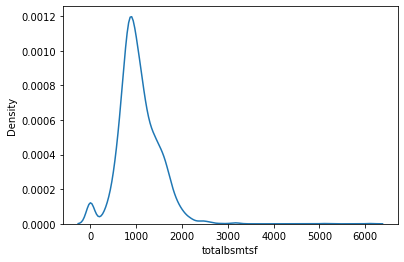

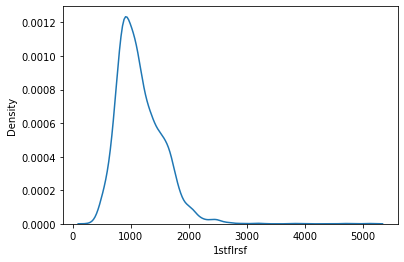

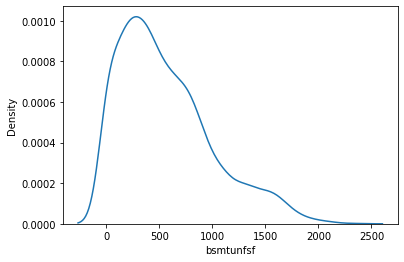

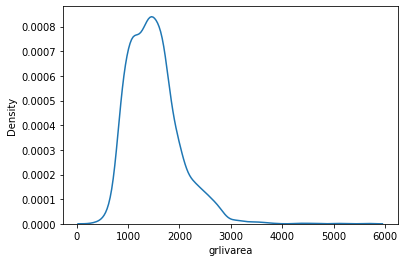

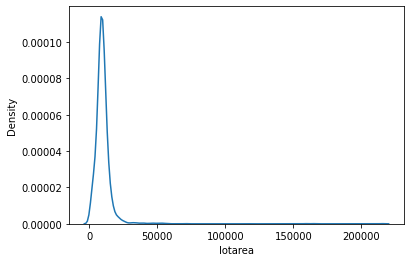

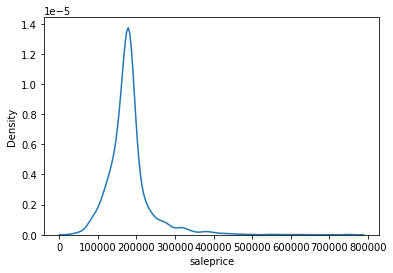

In [ ]:
# Now let's look at distrubution of each continues feature.
say=1
for i in df.loc[:,real_numeric].columns:
    plt.figure(say)
    sns.kdeplot(df[i])
    say+=1

<AxesSubplot:xlabel='garagearea', ylabel='Density'>

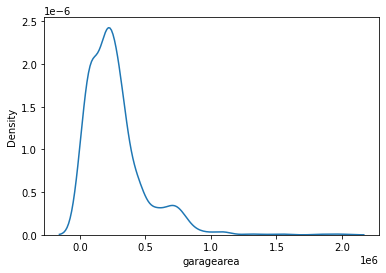

In [171]:
sns.kdeplot(((df['garagearea']))**2)

<AxesSubplot:xlabel='mssubclass', ylabel='Density'>

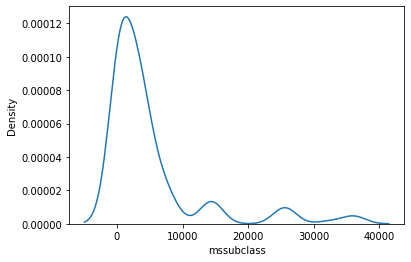

In [156]:
sns.kdeplot(np.power((df['mssubclass']),2))

<AxesSubplot:xlabel='totrmsabvgrd', ylabel='Density'>

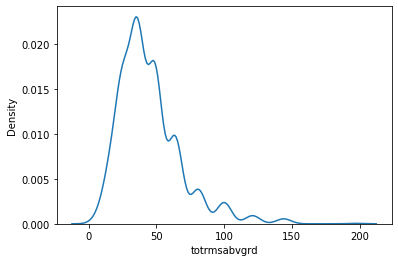

In [138]:
sns.kdeplot(np.power(df['totrmsabvgrd'],2))

In [5]:
# As we see from visulaization if we add square of given features we can get more normalized feature.
df['totrmsabvgrd']= np.power(df['totrmsabvgrd'],2)
df['mssubclass']= np.power(df['mssubclass'],2)
df['garagearea']= np.power(df['garagearea'],2)

In [161]:
df.columns

Index(['mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope',
       'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle',
       'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'roofstyle',
       'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'masvnrarea',
       'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond',
       'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating', 'heatingqc',
       'centralair', 'electrical', '1stflrsf', '2ndflrsf', 'lowqualfinsf',
       'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath',
       'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd',
       'functional', 'fireplaces', 'fireplacequ', 'garagetype', 'garageyrblt',
       'garagefinish', 'garagecars', 'garagearea', 'garagequal', 'garagecond',
       'paveddrive', 'wooddecksf'

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


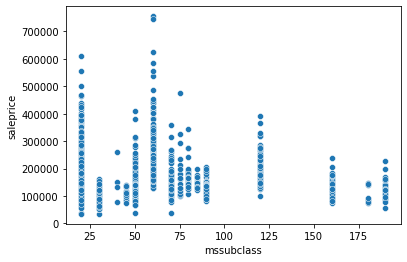

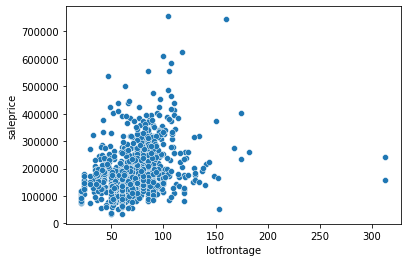

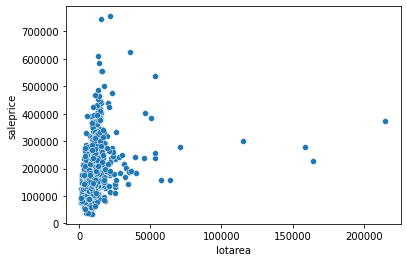

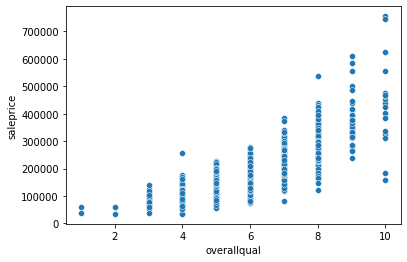

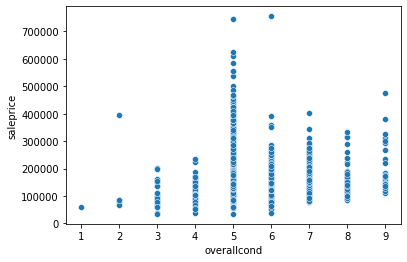

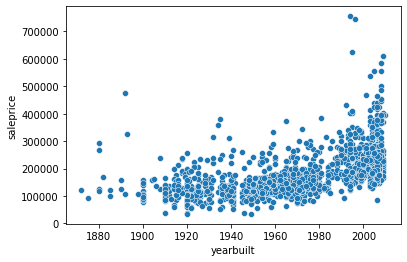

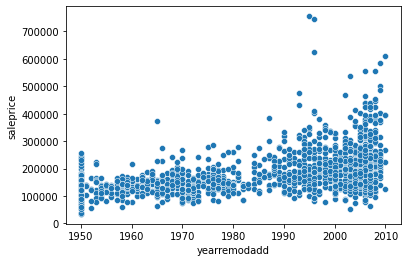

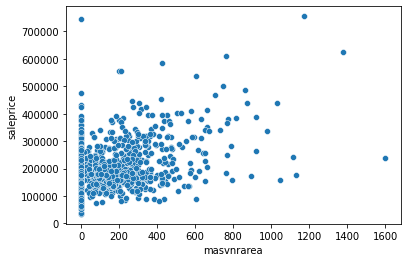

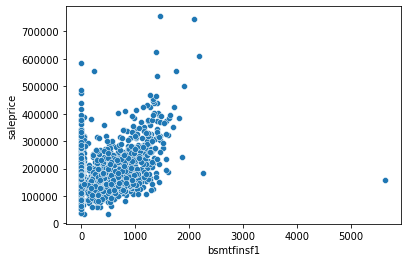

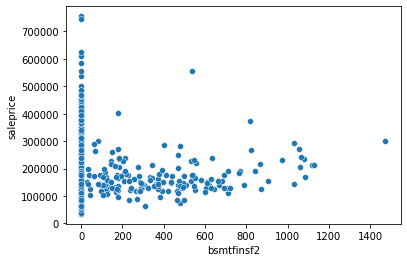

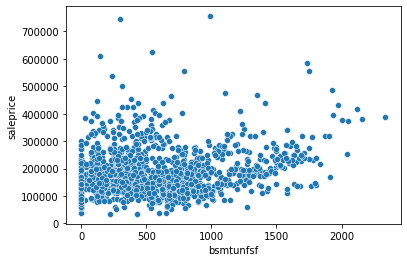

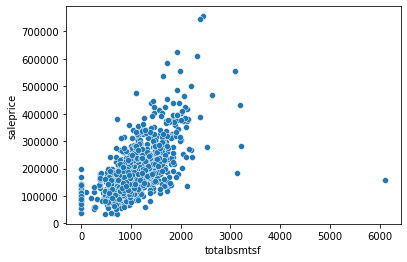

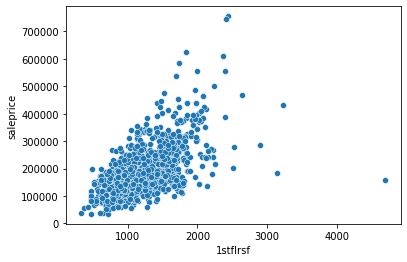

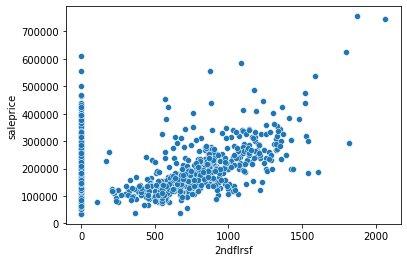

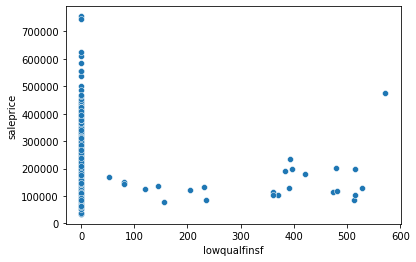

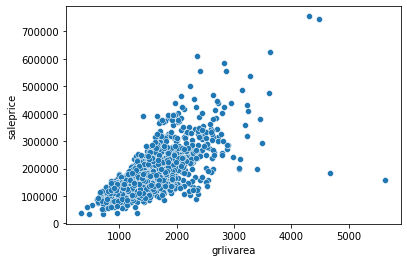

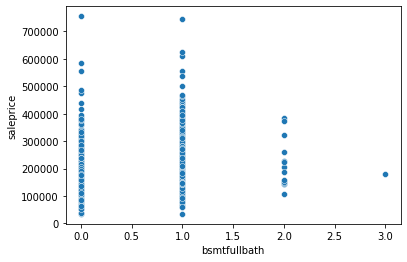

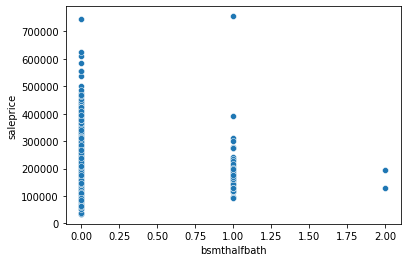

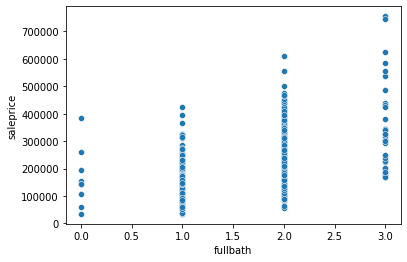

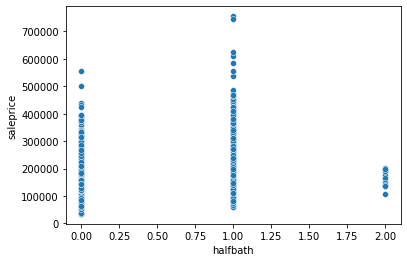

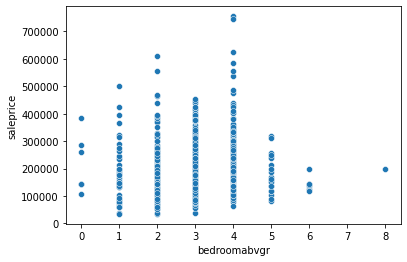

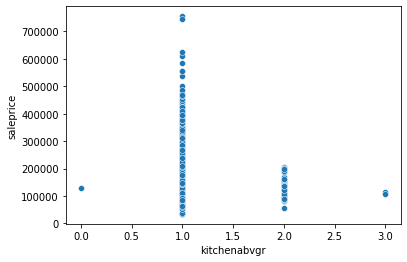

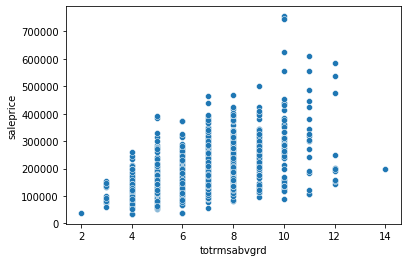

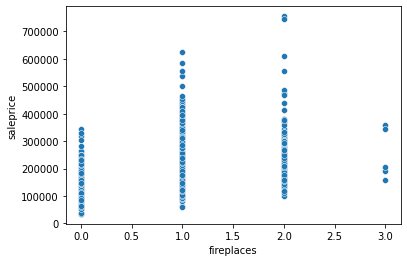

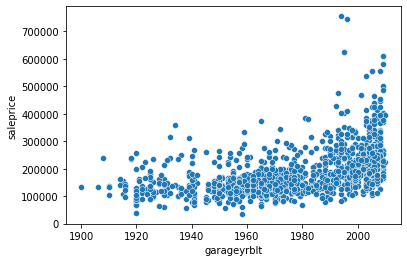

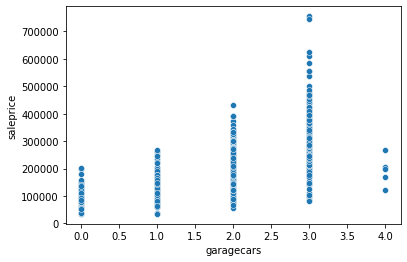

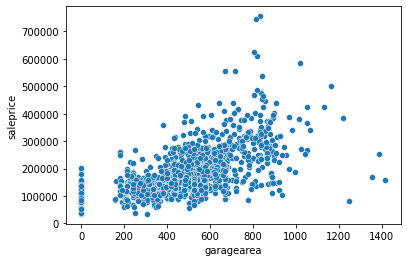

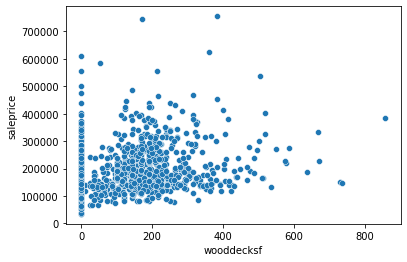

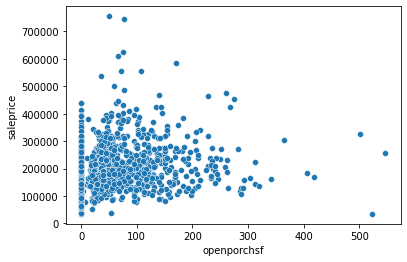

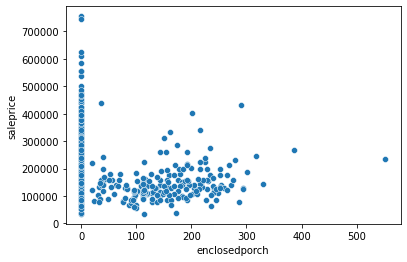

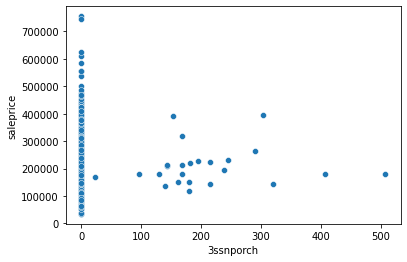

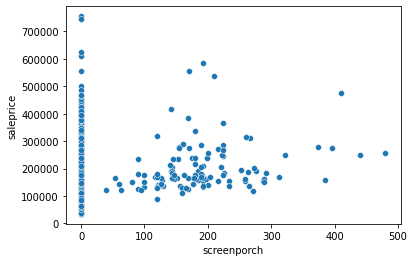

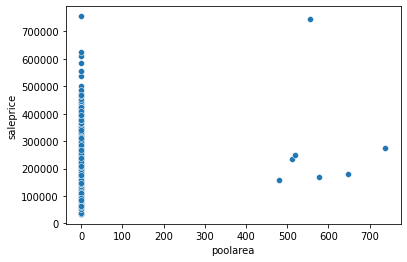

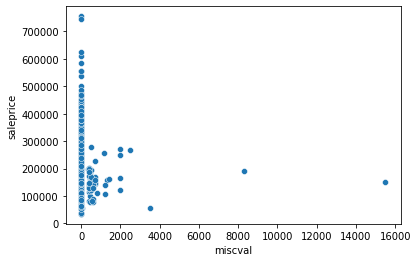

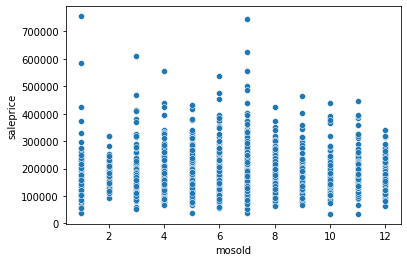

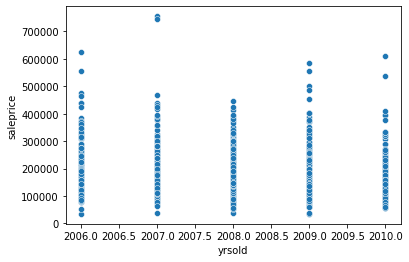

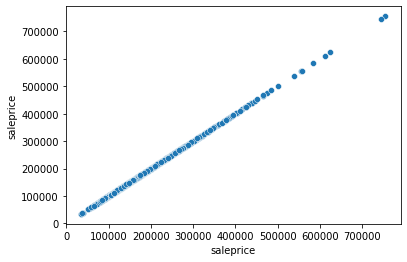

In [157]:
num_cols= df.select_dtypes(['int64','float64']).columns
n=1
for i in num_cols:
    plt.figure(n)
    sns.scatterplot(x=df[i],y=df['saleprice'])
    n+=1
# NOTES: masvnarea, bsmtfinsf1, totalbsmtsf, openporchsf

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


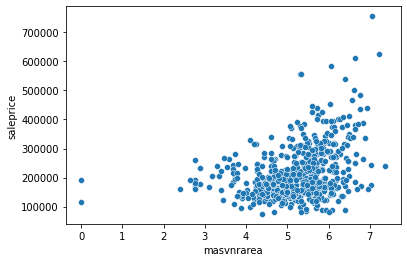

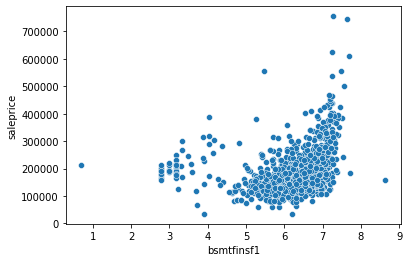

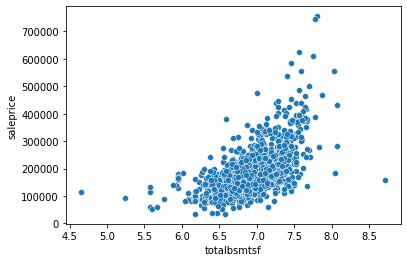

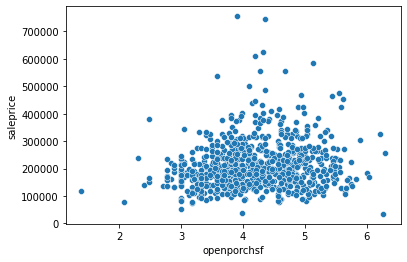

In [164]:
# As we see natural logarithm of selected features affect positively to dispertion of values
l=['masvnrarea', 'bsmtfinsf1', 'totalbsmtsf', 'openporchsf']

n=1
for i in l:
    plt.figure(n)
    sns.scatterplot(x=np.log(df[i]),y=df['saleprice'])
    n+=1

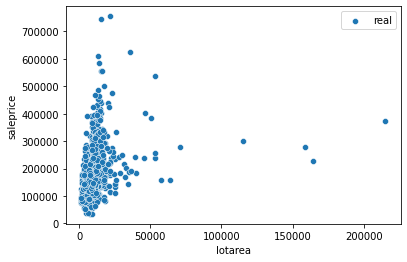

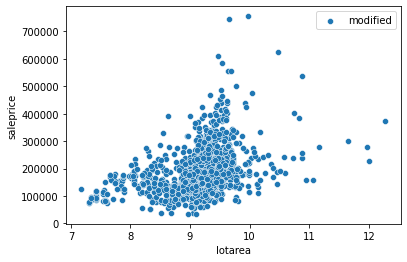

In [147]:
plt.figure(1)
sns.scatterplot(x=(df['lotarea']),y=df['saleprice'],label='real')
plt.figure(2)
sns.scatterplot(x=np.log(df['lotarea']),y=df['saleprice'],label= 'modified')
plt.legend()

<AxesSubplot:ylabel='Frequency'>

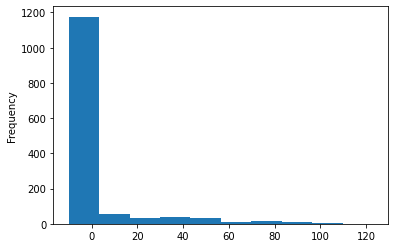

In [63]:
year_cols= [i for i in df.columns if 'year' in i or 'yr' in i][:-1]
(df[year_cols[2]]-df[year_cols[0]]).plot(kind='hist')
# As we see we can delete garageyrblt column. Becuase it has less variance for difference from yearbuilt. it means
# most of the homes has garage when they built

In [166]:
year_cols

['yearbuilt', 'yearremodadd', 'garageyrblt', 'yrsold']

(array([107.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1. ,  77.3, 153.6, 229.9, 306.2, 382.5, 458.8, 535.1, 611.4,
        687.7, 764. ]),
 <BarContainer object of 10 artists>)

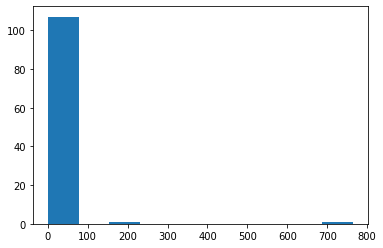

In [165]:
# This histogram shows that there is very fewdifference between year of building house and its modification. 
# We can delete modd_add column
plt.hist((df[year_cols[1]]-df[year_cols[0]]).value_counts().sort_values(ascending=False))

In [85]:
df.drop(labels= year_cols[1],inplace=True,axis=1)

KeyError: 'yearremodadd'

In [101]:
# we will multiply columns which have high Corelatoin with each others

cor_table= df.corr('pearson')
table= list(cor_table.index)
high_corr= []
i=0
while i<len(table):
    k=0
    while k<len(table):
        if i!=k and abs(cor_table.loc[table[i],table[k]])>.8 and not('year' in  table[k] or 'year' in table[i]\
                                                                    or 'yr' in table[k] or 'yr' in table[i]):
            print(table[i],'and',table[k],'CORRELATION\t--->','{:.2f}'.format(cor_table.loc[table[i],table[k]]))
            high_corr.append((table[i],table[k]))
        k+=1
    table.remove(table[i])
high_corr

totalbsmtsf and 1stflrsf CORRELATION	---> 0.82
grlivarea and totrmsabvgrd CORRELATION	---> 0.83
garagecars and garagearea CORRELATION	---> 0.88


[('totalbsmtsf', '1stflrsf'),
 ('grlivarea', 'totrmsabvgrd'),
 ('garagecars', 'garagearea')]

In [102]:
df['ttlbs_1stflr']= df[high_corr[0][0]]*df[high_corr[0][1]]
df['grli_totrm']= df[high_corr[1][0]]*df[high_corr[1][1]]
df['grg_car_grg_area']= df[high_corr[2][0]]*df[high_corr[2][1]]

In [105]:
df['yrsold']

0       2008
1       2007
2       2008
3       2006
4       2008
        ... 
1455    2007
1456    2010
1457    2010
1458    2010
1459    2008
Name: yrsold, Length: 1460, dtype: int64

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


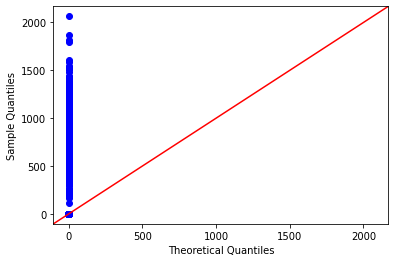

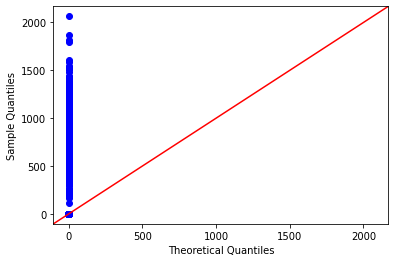

In [131]:
import statsmodels.api as sm
sm.qqplot(df['2ndflrsf'],line='45')

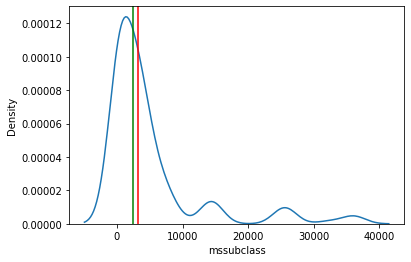

In [33]:
# Square help I thing. Take it into account.
sns.kdeplot(df['mssubclass']**2);
plt.axvline(56.89**2,c='red');
plt.axvline(50**2,c='green');

0.02997896890784547

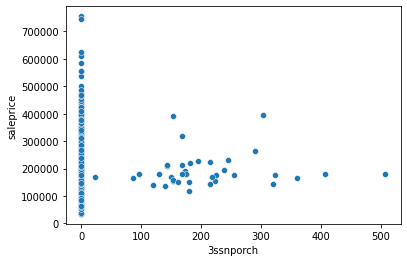

In [ ]:
sns.scatterplot(x=df['3ssnporch'],y=df['saleprice']);
display(df['3ssnporch'].corr(df['saleprice']))

In [ ]:
df[['garagecars']].describe().T

,count,mean,std,min,25%,50%,75%,max
garagecars,2918.0,1.766621,0.761624,0.0,1.0,2.0,2.0,5.0


In [ ]:
df[['garagearea']].describe().T

,count,mean,std,min,25%,50%,75%,max
garagearea,2918.0,472.874572,215.394815,0.0,320.0,480.0,576.0,1488.0


c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(100.0, 2381.9790427001813)

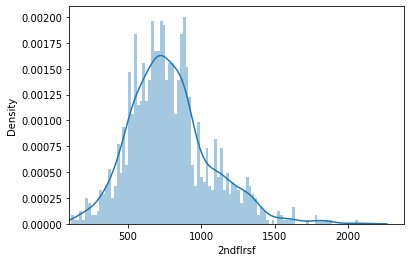

In [ ]:
sns.distplot(df.loc[df['2ndflrsf']>100,'2ndflrsf'],bins=100);
plt.xlim(100)

In [ ]:
df.head()

,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,169277.052498
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,187758.393989
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,183583.683570
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal,179317.477511
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal,150730.079977


In [7]:
x=df.drop(labels='saleprice',axis=1)
y=df['saleprice']

In [9]:
columns_for_imputing= x.loc[:,x.isnull().sum()>10].isnull().sum().index
col_for_imp_num= df[columns_for_imputing].select_dtypes(include=['int64','float64']).columns
col_for_imp_cat= df[columns_for_imputing].select_dtypes(include=["O"]).columns

In [10]:
x.isnull().sum().sort_values(ascending=False)[:10]

masvnrtype      872
fireplacequ     690
lotfrontage     259
garagetype       81
garageyrblt      81
garagefinish     81
garagequal       81
garagecond       81
bsmtexposure     38
bsmtfintype2     38
dtype: int64

In [11]:
test= x.loc[x[i].isnull(),i].index
train= x.loc[x[i].notnull(),i].index
display(x.loc[train,i].isnull().sum())

NameError: name 'i' is not defined

In [179]:
x.loc[test,i]

Series([], Name: lotarea, dtype: int64)

In [12]:
# imputing process of numeric vals
# I'll create DecisionTree model for imputing NaN values.
# I train model on values and then it will predict NaN values for each categories seperately.
# P.S It is first time that I use this method for imputing.
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import OneHotEncoder
for i in col_for_imp_num:
    test= x.loc[x[i].isnull(),i].index
    train= x.loc[x[i].notnull(),i].index
    y_ = x[i]
    x_ = x.drop(i,axis=1)
    x_= pd.get_dummies(x_.select_dtypes('O'))
    nul_x_train,nul_x_test,nul_y_train,nul_y_test= x_.loc[train],x_.loc[test],y_.loc[train],y_.loc[test ]
    model= DecisionTreeRegressor()
    model.fit(nul_x_train,nul_y_train)
    print(mse(nul_y_train,model.predict(nul_x_train)))
    print(mse(nul_y_train,[nul_y_train.mean()]*len(nul_x_train)))
    # I think result is good enough
    x.loc[test,i]= model.predict(nul_x_test)

0.31265611990008324
589.2581203146698
0.026287164612037707
609.1404623690802


In [13]:
from sklearn.metrics import recall_score
for i in col_for_imp_cat:
    test= x.loc[x[i].isnull(),i].index
    train= x.loc[x[i].notnull(),i].index
    y_ = x[i]
    x_ = x.drop(i,axis=1)
    x_= pd.get_dummies(x_.select_dtypes('O'))
    nul_x_train,nul_x_test,nul_y_train,nul_y_test= x_.loc[train],x_.loc[test],y_.loc[train],y_.loc[test ]
    model= DecisionTreeClassifier()
    model.fit(nul_x_train,nul_y_train)
    print(recall_score(nul_y_train,model.predict(nul_x_train),average='macro'))
    print(recall_score(nul_y_train,[nul_y_train.mode()]*len(nul_x_train),average='macro'))
    # I think result is good enough
    x.loc[test,i]= model.predict(nul_x_test)

0.9921875
0.3333333333333333
0.9996147919876733
0.25
0.9904075964716698
0.25
0.9821219457104955
0.25
0.9909726748160042
0.16666666666666666
0.9998673036093418
0.16666666666666666
0.9908571676067893
0.2
0.9981060606060606
0.16666666666666666
0.9917890668860078
0.3333333333333333
1.0
0.2
1.0
0.2


In [14]:
# ALmost we are done. Now we just have 3 columns with 8,8 and 1 null values. I'll fill them with most frequent and
# mean respectively

c= x.loc[:,x.isnull().any()].columns
num= x[c].select_dtypes(include=['int64','float64']).columns
x[num]= x[num].fillna(x[num].mean())
x['electrical']= x['electrical'].fillna(x['electrical'].mode()[0])

In [ ]:
# Finally our dataset doesn't contain any missing data

In [183]:
x.head()

,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition
0,3600,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,4096,Typ,0,TA,Attchd,2003.0,RFn,2,300304,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal
1,400,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,BrkFace,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,1296,Typ,1,TA,Attchd,1976.0,RFn,2,211600,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal
2,3600,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,1296,Typ,1,TA,Attchd,2001.0,RFn,2,369664,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal
3,4900,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,BrkFace,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,2401,Typ,1,Gd,Detchd,1998.0,Unf,3,412164,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml
4,3600,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,6561,Typ,1,TA,Attchd,2000.0,RFn,3,698896,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal


## First model

In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
x_tm= pd.get_dummies(x)
x_train,x_test,y_train,y_test= train_test_split(x_tm,y)

col_tr= ColumnTransformer(transformers=[
    ('num',StandardScaler(),x.select_dtypes(include= ['int64','float64']).columns)
])

pip= Pipeline(steps=[
    ('scale',col_tr),
    ('model',RandomForestRegressor())
])
pip.fit(x_train,y_train)

Pipeline(steps=[('scale',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['mssubclass', 'lotfrontage', 'lotarea', 'overallqual', 'overallcond',
       'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2',
       'bsmtunfsf', 'totalbsmtsf', '1stflrsf', '2ndflrsf', 'lowqualfinsf',
       'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath',
       'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd', 'fireplaces',
       'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf', 'openporchsf',
       'enclosedporch', '3ssnporch', 'screenporch', 'poolarea', 'miscval',
       'mosold', 'yrsold'],
      dtype='object'))])),
                ('model', RandomForestRegressor())])

In [83]:
np.sqrt(mse(y_test,pip.predict(x_test)))

30707.08539954209

## Let's choose best features with LassoCV

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LassoCV,RidgeCV
from sklearn.model_selection import train_test_split
col_tr= ColumnTransformer(transformers=[
    ('num',StandardScaler(),x.select_dtypes(include= ['int64','float64']).columns)
])

x_tm= pd.get_dummies(x)
 
pip= Pipeline(steps=[
    ('scale',col_tr),
    ('model',LassoCV())
])
pip.fit(x_tm,y)

Pipeline(steps=[('scale',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['mssubclass', 'lotfrontage', 'lotarea', 'overallqual', 'overallcond',
       'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2',
       'bsmtunfsf', 'totalbsmtsf', '1stflrsf', '2ndflrsf', 'lowqualfinsf',
       'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath',
       'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd', 'fireplaces',
       'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf', 'openporchsf',
       'enclosedporch', '3ssnporch', 'screenporch', 'poolarea', 'miscval',
       'mosold', 'yrsold'],
      dtype='object'))])),
                ('model', LassoCV())])

In [57]:
# burda qaldim, lassocv ile featureleri lazim olmayanlari silirdim. isledilen feature adlarini tap hansi ki fit zamani


index= ['mssubclass', 'lotfrontage', 'lotarea', 'overallqual', 'overallcond',
       'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2',
       'bsmtunfsf', 'totalbsmtsf', '1stflrsf', '2ndflrsf', 'lowqualfinsf',
       'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath',
       'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd', 'fireplaces',
       'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf', 'openporchsf',
       'enclosedporch', '3ssnporch', 'screenporch', 'poolarea', 'miscval',
       'mosold', 'yrsold']

d_tf= pd.DataFrame({
    "columns":index,
    "coef_":pip['model'].coef_
})

In [67]:
d_tf['coef_']= abs(d_tf['coef_'].values)
best_values_for_LassoCV= d_tf[d_tf['coef_']>0]['columns'].values

In [100]:
from sklearn.ensemble import RandomForestRegressor
x_2nd= x[best_values_for_LassoCV]
x_train,x_test,y_train,y_test= train_test_split(x_2nd,y)

col_tr= ColumnTransformer(transformers=[
    ('num',StandardScaler(),x_2nd.select_dtypes(include= ['int64','float64']).columns)
])

 
pip= Pipeline(steps=[
    ('scale',col_tr),
    ('model',LassoCV())
])
pip.fit(x_train,y_train)

Pipeline(steps=[('scale',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['mssubclass', 'lotarea', 'overallqual', 'overallcond', 'yearbuilt',
       'yearremodadd', 'masvnrarea', 'bsmtfinsf1', 'totalbsmtsf', '1stflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'fullbath', 'bedroomabvgr',
       'kitchenabvgr', 'totrmsabvgrd', 'fireplaces', 'garagecars',
       'wooddecksf', '3ssnporch', 'screenporch', 'poolarea', 'yrsold'],
      dtype='object'))])),
                ('model', LassoCV())])

In [104]:
np.sqrt(mse(y_test,pip.predict(x_test)))

28984.520731720146